In [1]:
import numpy as np

# 模拟投掷硬币10次，正面朝上的次数为7次
n_trials = 10
n_heads = 7

#### 定义似然函数
似然函数 $L(p)$ 描述了在给定参数 $p$ 的情况下，观察到这些数据的概率。对于二项分布，似然函数可以表示为：

$$ L(p) = \binom{n}{k} p^k (1-p)^{n-k} $$

其中 $n$ 是总投掷次数，$k$ 是正面朝上的次数，$p$ 是正面朝上的概率。

In [4]:
from scipy.special import comb

def likelihood(p, n_trials, n_heads):
    return comb(n_trials, n_heads) * (p ** n_heads) * ((1 - p) ** (n_trials - n_heads))

In [5]:
# 计算不同p值下的似然函数值
p_values = np.linspace(0, 1, 100)
likelihood_values = [likelihood(p, n_trials, n_heads) for p in p_values]

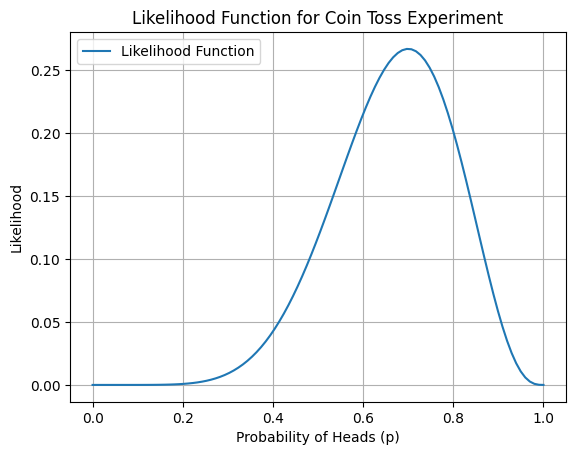

In [6]:
import matplotlib.pyplot as plt

# 绘制似然函数图形
plt.plot(p_values, likelihood_values, label='Likelihood Function')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function for Coin Toss Experiment')
plt.legend()
plt.grid(True)
plt.show()

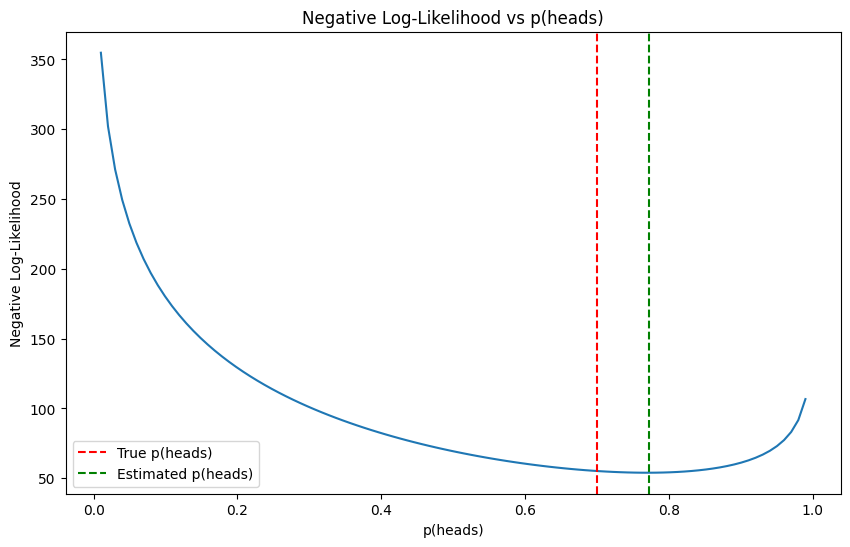

True p(heads): 0.7
Estimated p(heads): 0.772


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟投硬币的情况
def coin_flip(p_heads, num_flips):
    return np.random.choice(['H', 'T'], size=num_flips, p=[p_heads, 1-p_heads])

# 计算负对数似然
def negative_log_likelihood(outcomes, p_heads):
    return -np.sum(np.log([p_heads if o == 'H' else 1-p_heads for o in outcomes]))

# 设置真实的硬币正面概率
true_p_heads = 0.7

# 模拟100次投币
num_flips = 100
flips = coin_flip(true_p_heads, num_flips)

# 计算不同p_heads值的负对数似然
p_range = np.linspace(0.01, 0.99, 100)
nll_values = [negative_log_likelihood(flips, p) for p in p_range]

# 绘制负对数似然曲线
plt.figure(figsize=(10, 6))
plt.plot(p_range, nll_values)
plt.xlabel('p(heads)')
plt.ylabel('Negative Log-Likelihood')
plt.title('Negative Log-Likelihood vs p(heads)')
plt.axvline(x=true_p_heads, color='r', linestyle='--', label='True p(heads)')
plt.axvline(x=p_range[np.argmin(nll_values)], color='g', linestyle='--', label='Estimated p(heads)')
plt.legend()
plt.show()

print(f"True p(heads): {true_p_heads}")
print(f"Estimated p(heads): {p_range[np.argmin(nll_values)]:.3f}")

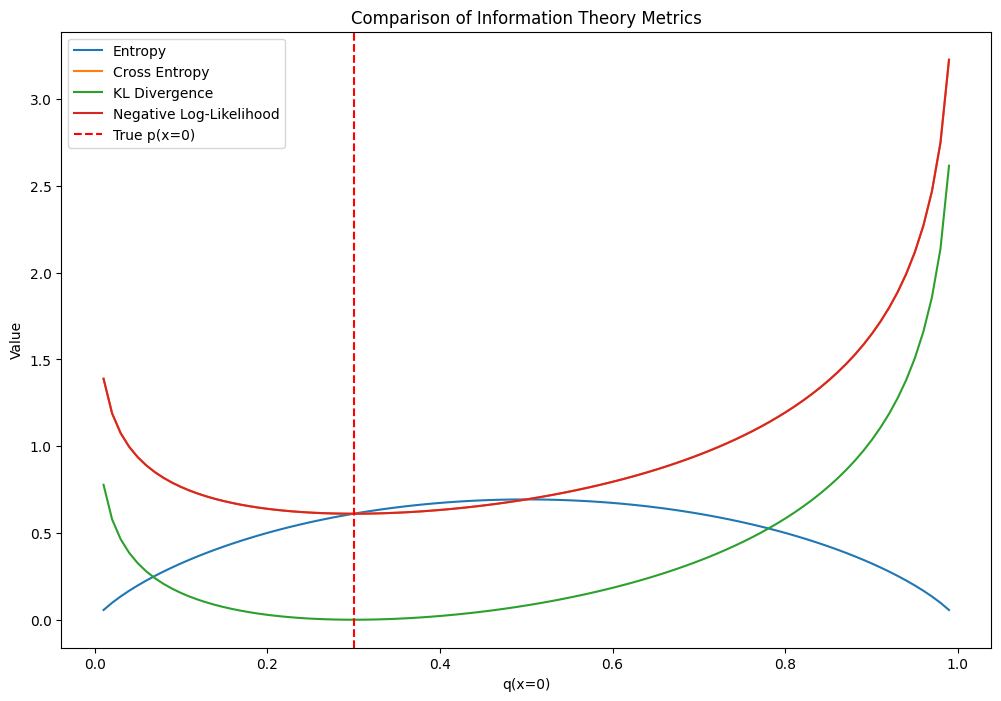

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def entropy(p):
    return -np.sum(p * np.log(p))

def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

def kl_divergence(p, q):
    return np.sum(p * np.log(p/q))

# 真实分布
p = np.array([0.3, 0.7])

# 模型预测的分布范围
q_range = np.linspace(0.01, 0.99, 100)

# 计算不同指标
entropies = [entropy(np.array([q, 1-q])) for q in q_range]
cross_entropies = [cross_entropy(p, np.array([q, 1-q])) for q in q_range]
kl_divs = [kl_divergence(p, np.array([q, 1-q])) for q in q_range]
neg_log_likelihoods = [-np.log(q) * p[0] - np.log(1-q) * p[1] for q in q_range]

# 绘图
plt.figure(figsize=(12, 8))
plt.plot(q_range, entropies, label='Entropy')
plt.plot(q_range, cross_entropies, label='Cross Entropy')
plt.plot(q_range, kl_divs, label='KL Divergence')
plt.plot(q_range, neg_log_likelihoods, label='Negative Log-Likelihood')
plt.xlabel('q(x=0)')
plt.ylabel('Value')
plt.title('Comparison of Information Theory Metrics')
plt.legend()
plt.axvline(x=p[0], color='r', linestyle='--', label='True p(x=0)')
plt.legend()
plt.show()

In [14]:
import torch
import matplotlib.pyplot as plt

In [30]:
x1 = torch.randn((1000,10))*10

In [32]:
x1.mean(), x1.std()

(tensor(0.0260), tensor(9.9772))

(array([5.75933804e-05, 5.75933804e-05, 5.75933804e-05, 2.30373522e-04,
        1.15186761e-04, 5.18340424e-04, 7.48713945e-04, 1.43983451e-03,
        1.26705437e-03, 2.30373522e-03, 4.26191015e-03, 7.08398579e-03,
        8.69660044e-03, 1.11731158e-02, 1.48014988e-02, 2.02728699e-02,
        2.03880567e-02, 2.73568557e-02, 3.00061512e-02, 3.31161937e-02,
        3.67445767e-02, 3.65142032e-02, 4.25615081e-02, 4.10064869e-02,
        3.83571914e-02, 3.51319621e-02, 3.39225011e-02, 2.70112954e-02,
        2.31525389e-02, 1.89482222e-02, 1.64717068e-02, 1.12307092e-02,
        8.92697396e-03, 6.79601889e-03, 5.47137114e-03, 4.43469029e-03,
        1.78539479e-03, 1.61261465e-03, 7.48713945e-04, 4.03153663e-04,
        4.03153663e-04, 2.30373522e-04, 0.00000000e+00, 5.75933804e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.75933804e-05]),
 array([-39.34093094, -37.60462029, -35.86830963, -34.13199898,
        -32.39568832, -30.6593

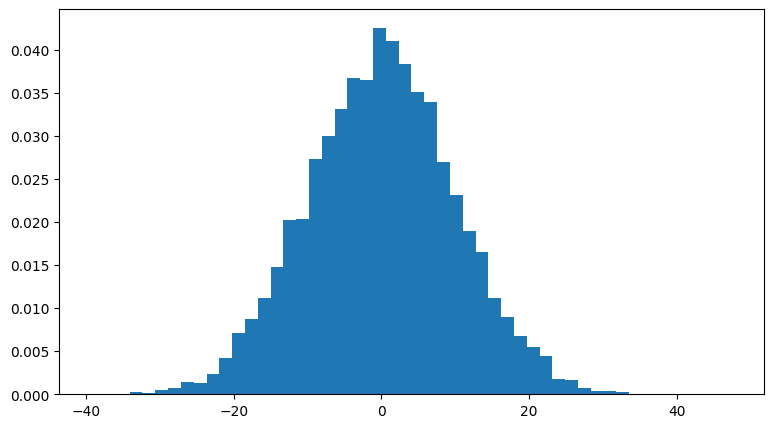

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x1.view(-1).tolist(),50,density=True)
# plt.hist(x1.view(-1).tolist(),50)